# Beat the machine challenge (SMAPE loss function)

## 1) Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Beat the machine challenge dataset.csv')
df = df.fillna(0)
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,2018-06-15T00:00:00.000000Z,-27.155995,0.332523,735.701951,107.513212,1.459349,0.099577,-62.472969,122.606756,0.000297,...,-0.195166,0.966355,102.051843,30.555759,24.130086,680.589152,-927.424059,-87.123208,62.666205,1156.681711
1,2018-06-14T00:00:00.000000Z,-17.012365,0.269606,723.576863,107.761407,11.138383,-0.254799,-60.965083,122.834661,0.008695,...,-0.080149,0.965490,102.031867,-12.797338,13.641165,699.645742,-924.946099,-84.658409,63.023348,972.159870
2,2018-06-13T00:00:00.000000Z,-3.306774,-1.054852,738.375336,107.556928,7.168404,-0.158063,-42.867335,122.621138,-0.003350,...,0.036628,0.965188,101.939175,20.709537,27.210881,705.710819,-939.902095,-85.299329,60.244882,1000.999754
3,2018-06-12T00:00:00.000000Z,-20.244923,0.199990,729.565275,107.706857,-8.592282,0.089837,-25.569892,122.127499,-0.000076,...,0.001390,0.963559,101.843815,-9.351715,-1.445244,724.573891,-931.245191,-87.296879,57.449428,970.889792
4,2018-06-11T00:00:00.000000Z,11.278201,0.284900,710.838013,107.527512,-12.255875,0.447218,-29.382555,122.137525,-0.002483,...,-0.818158,0.963392,101.896694,1.270608,-11.391039,733.148718,-922.523210,-86.495199,55.497440,1021.174747


In [325]:
# Symmetric Mean Absolute Percent Error (SMAPE) 
def SMAPE(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product
from sklearn.preprocessing import StandardScaler

X = df.drop(['y','Unnamed: 0'], axis = 1).values
Y = df['y'].fillna(0)

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.05, random_state = 101)

In [327]:
Y[475]

0.0

In [353]:
import keras.backend as K
# SMAPE(X_Train,Y_Train)
from numba import jit
import math

@jit
def smape_cpcm(y_true, y_pred):
    out = 0
    for i in range(y_true.shape[0]):
        a = y_true[i]
        b = y_pred[i]
        c = math.fabs(a)+math.fabs(b)
        if c == 0:
            continue
        out += math.fabs(a - b) / c
    out *= (200.0 / y_true.shape[0])
    return out

In [329]:
# smape_fast(X_Train,Y_Train)

In [3]:
import keras.backend as K
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))

Using TensorFlow backend.


In [66]:
smape_kun(X_Train[:,1],Y_Train)

199.2119149506594

## 2) Machine Learning

In [2047]:
# https://www.kaggle.com/nickycan/much-faster-smape-metric-function
# https://stackoverflow.com/questions/51444630/how-to-use-smape-evaluation-metric-on-train-dataset
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1000)

model.fit(X_Train,Y_Train)

y_pred = model.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

20.644971944366066


In [341]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_Train,Y_Train)

y_pred = clf.predict(X_Test)

print(smape_kun(Y_Test,y_pred))
# print(y_pred)

26.063916740529667


In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_Train,Y_Train)

y_pred = reg.predict(X_Test)

print(smape_kun(Y_Test,y_pred))
print(y_pred)

25.004396613559596
[878.94415482 271.43547028 597.30961577 967.43822198 439.99987519
 368.86978256 888.68338747 247.13701981 758.57591368 222.06131969
 -31.0845677   54.86896653 677.90026147 361.20533806 754.39439162
 822.70540431 259.26541475 145.6921482  266.32647931 128.17883079
 950.93466172 221.66391014 191.10224366 161.51247384 148.57011966]


In [86]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X_Train,Y_Train)

y_pred = svr_regressor.predict(X_Test)

print(smape_kun(Y_Test,y_pred))
#print(y_pred)

64.2885507824887


In [2057]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_Train,Y_Train)

y_pred = tree_regressor.predict(X_Test)

print(smape_kun(Y_Test,y_pred))
#print(y_pred)

27.31179557795265


In [2053]:
n_nodes = tree_regressor.tree_.node_count
children_left = tree_regressor.tree_.children_left
children_right = tree_regressor.tree_.children_right
feature = tree_regressor.tree_.feature
threshold = tree_regressor.tree_.threshold
print(feature)

#clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(tree_regressor,out_file='tree.dot') 

[22 22 26  0 -2 29  0 24 -2 -2 -2 19 23  8  6 27 -2 14 -2 -2 29 -2 -2 11
 -2 -2 12 -2 -2 27 -2 -2 26 24 27  4 24 -2 -2  5 -2 -2 18 -2 29  3 -2 -2
 -2 22  4 -2  0 -2 -2  7 26  6 -2 -2 -2 12 21 -2  4 -2 -2 12 -2 -2 22  7
 -2 22 -2 -2  1 -2 -2 27 13  9  5 27  8 -2 -2 -2 14 -2 13  0 -2 -2  2 -2
 -2 26 -2 -2  6 19 12  3 29 10 -2 -2 -2 15 27 -2 -2 12 -2 -2  0 26 -2  2
 -2 -2 29 21 -2 -2  0 -2 -2  1 29 29 -2 14 -2 -2 12 -2 -2 15 -2 -2  9  6
  0 -2 -2 -2 10  1 -2 -2 12  4 16 -2 -2 27 -2 -2 24  6 -2 -2 -2  6 11 26
  5 29  5 -2 15 -2 -2 10  8 18 -2  3 -2 -2 -2 -2  7 17  8  9 -2 17 -2 -2
 13 -2 -2 21  8 21 -2 -2  4 -2 -2 -2  8 -2 11 27  6  5 -2 -2 -2  4 28 15
  4 -2 -2 -2 -2 12 16 29 -2 -2 13 -2 -2 -2 21 -2 16 -2 -2 29  8  9 24 17
  4 -2 -2  7 -2  6 -2 -2  1  1 -2 -2 -2 26 -2 -2 12 -2 12 29 -2 -2  3 -2
 -2  4 14 18  6 -2 -2 -2  6 15 -2 -2 -2  7 25 10 -2 -2 -2 -2 24  9 22 -2
 18 12 -2 27 27 -2 -2 -2 -2 21 18 23  9  1  1 -2 -2  9 -2 -2 -2 17 -2  2
 -2 -2 23  6 -2 -2 -2 23 -2  7 15 -2 -2  6 -2 -2 27

In [98]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree = 1)
# X_poly = poly_reg.fit_transform(X_Train)
# poly_reg_model = LinearRegression()
# poly_reg_model.fit(X_poly, Y_Train)

# y_pred = poly_reg_model.predict(X_Test)

# print(smape_kun(Y_Test,y_pred))
# #print(y_pred)

In [47]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
Y_Train = lab_enc.fit_transform(Y_Train)
print(utils.multiclass.type_of_target(Y_Train))

multiclass


In [56]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(smape_kun(Y_Test,predictions))

66.34879909224844


In [57]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(smape_kun(Y_Test,predictionforest))

61.17716928709699


In [58]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(smape_kun(Y_Test,predictionsvm))

57.102591933409116


In [59]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(smape_kun(Y_Test,predictionsvm))

57.102591933409116


In [60]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(smape_kun(Y_Test,predictionlda))

55.918068761306586


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [61]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(smape_kun(Y_Test,predictionnb))

174.86033285782491


In [74]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_Train,Y_Train)

y_pred = clf.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

62.43621080149953


## 3) Deep Learning

In [3]:
import keras.backend as K
def smape_kun2(y_true, y_pred):
    return K.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [145]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

import pandas as pd
import numpy as np

X_train = X_Train
y_train = Y_Train

input_dim = X_train.shape[1]
#nb_classes = Y_Train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss=smape_kun2, optimizer='rmsprop')

print("Training...")
model.fit(X_train, y_train, nb_epoch=10, validation_split=0.1,verbose=2)

print("Generating test predictions...")
preds = model.predict_classes(X_Test, verbose=0)

preds = model.predict(X_Test)
def twoone(list1):
    return [val for lst in list1 for val in lst]

preds = twoone(preds)

print(smape_kun(Y_Test,preds))

Training...


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 427 samples, validate on 48 samples
Epoch 1/10
 - 7s - loss: 198.3986 - val_loss: 198.3949
Epoch 2/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 3/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 4/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 5/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 6/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 7/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 8/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 9/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Epoch 10/10
 - 0s - loss: 198.3986 - val_loss: 198.3949
Generating test predictions...
198.1458501453552


In [147]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.objectives import MSE, MAE
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(input_dim=X_Train.shape[1], output_dim=256))
# model.add(Activation("tanh"))
model.add(Activation("relu"))
#model.add(Dropout(0.50))
model.add(Dense(output_dim=128))
model.add(Activation("relu"))
#model.add(Dropout(0.50))
model.add(Dense(output_dim=64))
model.add(Activation("relu"))
#model.add(Dropout(0.50))
model.add(Dense(1, activation='linear'))
model.compile(loss=smape_kun2, optimizer='adam', metrics=['mse','mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
train_log = model.fit(X_Train, Y_Train.values, batch_size=256, nb_epoch=1000, validation_split=0.1, verbose=2, callbacks=[early_stopping])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, units=256)`
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=64)`
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 427 samples, validate on 48 samples
Epoch 1/1000
 - 7s - loss: 199.7936 - mean_squared_error: 200855.6350 - mean_absolute_error: 359.9769 - val_loss: 199.8989 - val_mean_squared_error: 239648.8906 - val_mean_absolute_error: 406.2511
Epoch 2/1000
 - 0s - loss: 199.0881 - mean_squared_error: 200929.9507 - mean_absolute_error: 360.1365 - val_loss: 199.8147 - val_mean_squared_error: 239731.1406 - val_mean_absolute_error: 406.4583
Epoch 3/1000
 - 0s - loss: 198.5350 - mean_squared_error: 201024.6970 - mean_absolute_error: 360.3620 - val_loss: 199.7036 - val_mean_squared_error: 239838.6406 - val_mean_absolute_error: 406.7338
Epoch 4/1000
 - 0s - loss: 197.9387 - mean_squared_error: 201140.2840 - mean_absolute_error: 360.6442 - val_loss: 199.5602 - val_mean_squared_error: 239931.8281 - val_mean_absolute_error: 407.0365
Epoch 5/1000
 - 0s - loss: 197.3886 - mean_squared_error: 201230.7729 - mean_absolute_error: 360.9322 - val_loss: 199.3915 - val_mean_squared_error: 239984.4219 - val_

Epoch 43/1000
 - 0s - loss: 50.3356 - mean_squared_error: 28138.9954 - mean_absolute_error: 135.4953 - val_loss: 46.1601 - val_mean_squared_error: 27448.7012 - val_mean_absolute_error: 135.3173
Epoch 44/1000
 - 0s - loss: 48.3893 - mean_squared_error: 24785.5562 - mean_absolute_error: 128.1077 - val_loss: 42.8395 - val_mean_squared_error: 23157.7500 - val_mean_absolute_error: 121.1001
Epoch 45/1000
 - 0s - loss: 47.1990 - mean_squared_error: 22885.9213 - mean_absolute_error: 122.4502 - val_loss: 40.4085 - val_mean_squared_error: 20537.1816 - val_mean_absolute_error: 108.4279
Epoch 46/1000
 - 0s - loss: 46.5108 - mean_squared_error: 21915.3667 - mean_absolute_error: 118.1790 - val_loss: 39.4949 - val_mean_squared_error: 19289.6055 - val_mean_absolute_error: 102.8799
Epoch 47/1000
 - 0s - loss: 46.2652 - mean_squared_error: 21928.9038 - mean_absolute_error: 116.4363 - val_loss: 39.3178 - val_mean_squared_error: 18822.1348 - val_mean_absolute_error: 101.8852
Epoch 48/1000
 - 0s - loss: 46

In [149]:
preds = model.predict(X_Test)
def twoone(list1):
    return [val for lst in list1 for val in lst]

pred = twoone(preds)
print(pred)
print(smape_kun(Y_Test,pred))

[911.6407, 187.3954, 571.9978, 957.6853, 495.19437, 229.01299, 921.4407, 247.2915, 712.6823, 254.09769, 276.24014, 280.7891, 627.2105, 261.51898, 694.2395, 815.4807, 273.53857, 164.92758, 250.02097, 232.25717, 940.82605, 244.24734, 228.15686, 175.56685, 142.95177]
35.24893362544566


In [151]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=30, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss=smape_kun2, optimizer='adam')
	return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_Train, Y_Train, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -39.94 (9.28) MSE


In [153]:
preds = model.predict(X_Test)

preds = twoone(preds)
print(preds)
print(smape_kun(Y_Test,preds))

[911.6407, 187.3954, 571.9978, 957.6853, 495.19437, 229.01299, 921.4407, 247.2915, 712.6823, 254.09769, 276.24014, 280.7891, 627.2105, 261.51898, 694.2395, 815.4807, 273.53857, 164.92758, 250.02097, 232.25717, 940.82605, 244.24734, 228.15686, 175.56685, 142.95177]
35.24893362544566


In [172]:
import keras.backend as K
def smape_kun2(y_true, y_pred):
    return K.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

from keras.layers import LSTM
import keras.backend as K

X_Train2 = np.reshape(X_Train, (X_Train.shape[0], X_Train.shape[1], 1))

regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_Train2.shape[1],1)))
# regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
# regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
# regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
# regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss='mean_squared_error',  metrics=['mae','accuracy'])

regressor.fit(X_Train2, Y_Train, epochs = 100, batch_size = 32)

Epoch 1/100
475/475 [==============================] - 27s 57ms/step - loss: 202821.8991 - mean_absolute_error: 362.6674 - acc: 0.0232
Epoch 2/100
475/475 [==============================] - 5s 11ms/step - loss: 196451.7145 - mean_absolute_error: 355.0742 - acc: 0.0000e+00
Epoch 3/100
475/475 [==============================] - 5s 11ms/step - loss: 194513.5022 - mean_absolute_error: 352.6288 - acc: 0.0000e+00
Epoch 4/100
475/475 [==============================] - 5s 11ms/step - loss: 193337.2537 - mean_absolute_error: 351.2096 - acc: 0.0000e+00
Epoch 5/100
475/475 [==============================] - 6s 13ms/step - loss: 192200.6888 - mean_absolute_error: 349.8334 - acc: 0.0000e+00
Epoch 6/100
475/475 [==============================] - 6s 12ms/step - loss: 191086.2868 - mean_absolute_error: 348.5499 - acc: 0.0000e+00
Epoch 7/100
475/475 [==============================] - 6s 12ms/step - loss: 190031.5357 - mean_absolute_error: 347.2829 - acc: 0.0000e+00
Epoch 8/100
475/475 [================

475/475 [==============================] - 4s 9ms/step - loss: 145837.8639 - mean_absolute_error: 289.7079 - acc: 0.0000e+00
Epoch 61/100
475/475 [==============================] - 4s 8ms/step - loss: 145141.7851 - mean_absolute_error: 288.7561 - acc: 0.0000e+00
Epoch 62/100
475/475 [==============================] - 4s 9ms/step - loss: 144472.5931 - mean_absolute_error: 287.8102 - acc: 0.0000e+00
Epoch 63/100
475/475 [==============================] - 4s 9ms/step - loss: 143795.0927 - mean_absolute_error: 286.8742 - acc: 0.0000e+00
Epoch 64/100
475/475 [==============================] - 4s 9ms/step - loss: 143118.9632 - mean_absolute_error: 285.9249 - acc: 0.0000e+00
Epoch 65/100
475/475 [==============================] - 4s 9ms/step - loss: 142465.5583 - mean_absolute_error: 285.0191 - acc: 0.0000e+00
Epoch 66/100
475/475 [==============================] - 4s 9ms/step - loss: 141800.0370 - mean_absolute_error: 284.0722 - acc: 0.0000e+00
Epoch 67/100
475/475 [=========================

In [174]:
X_Test2 = np.reshape(X_Test, (X_Test.shape[0], X_Test.shape[1], 1))

preds = regressor.predict(X_Test2)

preds = twoone(preds)
print(preds)
print(smape_kun(Y_Test,preds))

[142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123, 142.48123]
91.85384851003653


In [201]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=60, input_dim=30))
    regressor.add(Dense(units=80))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=[smape_kun2])
    return regressor

from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=64,epochs=500)

results=regressor.fit(X_Train,Y_Train)

preds = regressor.predict(X_Test)

Epoch 1/500
475/475 [==============================] - 10s 20ms/step - loss: 204036.5968 - smape_kun2: 198.5021
Epoch 2/500
475/475 [==============================] - 0s 141us/step - loss: 202708.7019 - smape_kun2: 196.4696
Epoch 3/500
475/475 [==============================] - 0s 99us/step - loss: 201133.3982 - smape_kun2: 194.6221
Epoch 4/500
475/475 [==============================] - 0s 130us/step - loss: 198962.5322 - smape_kun2: 192.8430
Epoch 5/500
475/475 [==============================] - 0s 130us/step - loss: 195706.1873 - smape_kun2: 190.5870
Epoch 6/500
475/475 [==============================] - 0s 143us/step - loss: 191418.3061 - smape_kun2: 187.9163
Epoch 7/500
475/475 [==============================] - 0s 178us/step - loss: 185839.9747 - smape_kun2: 184.8510
Epoch 8/500
475/475 [==============================] - 0s 124us/step - loss: 178785.6684 - smape_kun2: 180.8041
Epoch 9/500
475/475 [==============================] - 0s 218us/step - loss: 170023.8937 - smape_kun2: 17

Epoch 147/500
475/475 [==============================] - 0s 248us/step - loss: 5423.2824 - smape_kun2: 36.2355
Epoch 148/500
475/475 [==============================] - 0s 237us/step - loss: 5378.7614 - smape_kun2: 36.1072
Epoch 149/500
475/475 [==============================] - 0s 275us/step - loss: 5389.2777 - smape_kun2: 36.1935
Epoch 150/500
475/475 [==============================] - 0s 271us/step - loss: 5407.2879 - smape_kun2: 36.1693
Epoch 151/500
475/475 [==============================] - 0s 298us/step - loss: 5396.1624 - smape_kun2: 36.1248
Epoch 152/500
475/475 [==============================] - 0s 262us/step - loss: 5403.3298 - smape_kun2: 36.1781
Epoch 153/500
475/475 [==============================] - 0s 262us/step - loss: 5401.6929 - smape_kun2: 36.2457
Epoch 154/500
475/475 [==============================] - 0s 229us/step - loss: 5398.9051 - smape_kun2: 36.2449
Epoch 155/500
475/475 [==============================] - 0s 332us/step - loss: 5424.0853 - smape_kun2: 36.2432
E

475/475 [==============================] - 0s 189us/step - loss: 5390.3476 - smape_kun2: 36.1752
Epoch 221/500
475/475 [==============================] - 0s 178us/step - loss: 5351.7149 - smape_kun2: 36.1595
Epoch 222/500
475/475 [==============================] - 0s 189us/step - loss: 5371.4031 - smape_kun2: 36.1656
Epoch 223/500
475/475 [==============================] - 0s 151us/step - loss: 5361.4658 - smape_kun2: 36.0200
Epoch 224/500
475/475 [==============================] - 0s 153us/step - loss: 5378.4879 - smape_kun2: 36.1380
Epoch 225/500
475/475 [==============================] - 0s 155us/step - loss: 5360.8855 - smape_kun2: 36.0408
Epoch 226/500
475/475 [==============================] - 0s 191us/step - loss: 5364.2449 - smape_kun2: 36.0658
Epoch 227/500
475/475 [==============================] - 0s 197us/step - loss: 5356.5331 - smape_kun2: 36.1357
Epoch 228/500
475/475 [==============================] - 0s 160us/step - loss: 5391.5457 - smape_kun2: 36.1753
Epoch 229/500
4

475/475 [==============================] - 0s 84us/step - loss: 5340.0255 - smape_kun2: 36.0469
Epoch 368/500
475/475 [==============================] - 0s 82us/step - loss: 5363.2554 - smape_kun2: 36.1629
Epoch 369/500
475/475 [==============================] - 0s 78us/step - loss: 5342.0576 - smape_kun2: 36.0898
Epoch 370/500
475/475 [==============================] - 0s 88us/step - loss: 5328.7693 - smape_kun2: 36.1402
Epoch 371/500
475/475 [==============================] - 0s 84us/step - loss: 5359.2374 - smape_kun2: 36.4024
Epoch 372/500
475/475 [==============================] - 0s 92us/step - loss: 5343.9443 - smape_kun2: 36.2025
Epoch 373/500
475/475 [==============================] - 0s 94us/step - loss: 5358.7697 - smape_kun2: 36.0913
Epoch 374/500
475/475 [==============================] - 0s 105us/step - loss: 5355.0413 - smape_kun2: 36.0663
Epoch 375/500
475/475 [==============================] - 0s 101us/step - loss: 5359.1259 - smape_kun2: 36.0625
Epoch 376/500
475/475 

475/475 [==============================] - 0s 111us/step - loss: 5377.0448 - smape_kun2: 36.1810
Epoch 442/500
475/475 [==============================] - 0s 92us/step - loss: 5356.5267 - smape_kun2: 36.1158
Epoch 443/500
475/475 [==============================] - 0s 120us/step - loss: 5363.3819 - smape_kun2: 36.2975
Epoch 444/500
475/475 [==============================] - 0s 103us/step - loss: 5318.9728 - smape_kun2: 36.0456
Epoch 445/500
475/475 [==============================] - 0s 84us/step - loss: 5345.1021 - smape_kun2: 36.0801
Epoch 446/500
475/475 [==============================] - 0s 94us/step - loss: 5349.0850 - smape_kun2: 36.3693
Epoch 447/500
475/475 [==============================] - 0s 105us/step - loss: 5343.7777 - smape_kun2: 36.0449
Epoch 448/500
475/475 [==============================] - 0s 176us/step - loss: 5336.7034 - smape_kun2: 36.0533
Epoch 449/500
475/475 [==============================] - 0s 189us/step - loss: 5318.1898 - smape_kun2: 36.1343
Epoch 450/500
475/

In [202]:
#preds = twoone(preds)
print(preds)
print(smape_kun(Y_Test,preds))

[890.8737   276.46103  596.31995  967.76605  444.57666  368.0778
 908.9635   254.65173  760.87427  210.63638  -42.37513   48.488903
 678.8518   359.79123  754.20416  835.45465  257.5565   132.3937
 260.53668  133.7095   947.7647   232.34094  186.837    155.31703
 138.75868 ]
26.052232887845776


## 4) PCA

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.05, random_state = 101)

In [207]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_reduced,Y_Train)

y_pred = reg.predict(X_test_reduced)

print(smape_kun(Y_Test,y_pred))
print(y_pred)

40.09596894778119
[808.00692392 168.07008994 655.99543112 868.81104253 534.1630428
 249.16776434 825.62297657 329.74390178 722.22092148 186.66001476
  60.02655008 123.26864696 672.00425871 204.35558482 719.59177543
 751.34258603 135.16065898 263.91702929 127.47422573 171.28422122
 838.67664428 287.51104222 125.58149886 215.24300264 238.27416895]


In [284]:
# https://www.kaggle.com/nickycan/much-faster-smape-metric-function
# https://stackoverflow.com/questions/51444630/how-to-use-smape-evaluation-metric-on-train-dataset
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-100000000000000000000000000000000000000000000000000000000000000000000000)

model.fit(X_Train,Y_Train)

y_pred = model.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

19.89290866285403


In [285]:
print(y_pred)

[ 858.10393263  338.35985324  593.78704778  980.26435107  395.15560108
  322.48834466  852.3925124   282.36088116  707.46396514  236.61318795
    0.          -29.68706276  607.4751719   303.83908373  781.92738793
  800.64062639  307.42732284  215.41203314  242.88912554   90.35830554
 1045.57883515  170.22135781  184.55509373  177.8287852   196.20445605]


## 5) Reduced Dataset Using Main Features

In [2095]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product
from sklearn.preprocessing import StandardScaler

X = df[['x23','x27','x1']].values
Y = df['y'].fillna(0)

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.05, random_state = 101)

In [2109]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-100000000000000000000000000000000000000000000000000000000000000000000000)

model.fit(X_Train,Y_Train)

y_pred = model.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

18.947119659857407


In [2110]:
print(y_pred)

[973.35741739 290.7526603  550.16044726 965.88266561 389.49491833
 326.10931005 796.04043019 226.79088581 757.97755271 248.23066973
   0.         -35.35359376 625.74974575 332.37854465 819.4811063
 856.29751248 292.83895775 226.67837731 261.63100507  59.87685686
 980.00510116 203.11722888 135.09892497 173.76461476 195.18597236]


## 6) Reduced Dataset Using Main Features (amplified)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product
from sklearn.preprocessing import StandardScaler

X = df[['x23','x27','x1','x30','x25']].values
Y = df['y'].fillna(0)

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.05, random_state = 101)

In [2788]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-100000000000000000000000000000000000000000000000000000000000000000000000)

model.fit(X_Train,Y_Train)

y_pred = model.predict(X_Test)

print(smape_kun(Y_Test,y_pred))

17.01631533302832


In [2789]:
print(y_pred)

[1004.49299284  296.67215509  606.92203677  930.80696417  389.45011453
  322.79420456  797.41376627  224.13645043  776.42725742  224.60236181
    0.          -28.86249122  607.64636444  312.73809626  768.1643219
  832.00251452  342.38202229  185.27106599  217.03195252   81.4940105
 1010.36273526  189.87525196  167.49650988  170.41302696  237.07337841]


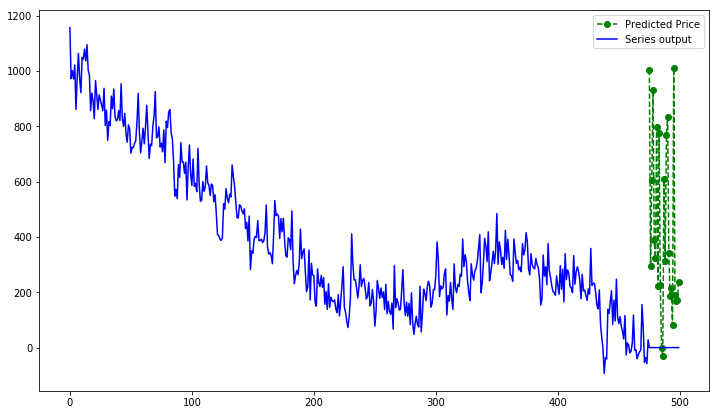

In [53]:
predictions = [1004.49299284,  296.67215509,  606.92203677,  930.80696417,  389.45011453,
              322.79420456,  797.41376627,  224.13645043,  776.42725742,  224.60236181,
                0.,          -28.86249122,  607.64636444,  312.73809626,  768.1643219,
              832.00251452,  342.38202229,  185.27106599,  217.03195252,   81.4940105,
             1010.36273526,  189.87525196,  167.49650988,  170.41302696,  237.07337841]

plt.figure(figsize=(12,7))
# plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(df['y'], 'blue', label='Series output')
plt.legend()

In [2599]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_Train,Y_Train)

y_pred = reg.predict(X_Test)

print(smape_kun(Y_Test,y_pred))
print(y_pred)

46.56804321077557
[819.75728623 156.31577423 585.4534609  773.7382153  469.04389869
 216.02018993 778.59398493 374.52788425 642.70970511  69.50485025
  71.26889868  16.69786567 620.97426679 181.84609393 664.33560279
 746.48143099 162.70711136 376.33849894 237.81512018  64.85932864
 809.79270624 315.69572433 307.93111503 370.78816388 370.88070697]


## 7) Deep Learning (new approach)

In [2806]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=20, input_dim=5))
    regressor.add(Dense(units=80))
    regressor.add(Dense(units=40))
    regressor.add(Dense(units=10))
    regressor.add(Dense(units=80))
    regressor.add(Dense(units=40))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=[smape_kun2])
    return regressor

from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=8)

results=regressor.fit(X_Train,Y_Train)

preds = regressor.predict(X_Test)

Epoch 1/8
475/475 [==============================] - 11s 24ms/step - loss: 203049.2304 - smape_kun2: 195.7171
Epoch 2/8
475/475 [==============================] - 0s 210us/step - loss: 186720.7950 - smape_kun2: 181.7566
Epoch 3/8
475/475 [==============================] - 0s 229us/step - loss: 149973.8881 - smape_kun2: 146.1624
Epoch 4/8
475/475 [==============================] - 0s 216us/step - loss: 122084.5621 - smape_kun2: 125.3523
Epoch 5/8
475/475 [==============================] - 0s 233us/step - loss: 102739.6822 - smape_kun2: 124.3061
Epoch 6/8
475/475 [==============================] - 0s 231us/step - loss: 72982.2772 - smape_kun2: 107.5489
Epoch 7/8
475/475 [==============================] - 0s 267us/step - loss: 37188.7445 - smape_kun2: 76.9594
Epoch 8/8
475/475 [==============================] - 0s 301us/step - loss: 23492.4762 - smape_kun2: 54.0372


In [2807]:
#preds = twoone(preds)
print(preds)
print(smape_kun(Y_Test,preds))

[710.4563   215.78812  593.3473   727.5604   501.24008  223.35695
 665.9081   438.1447   586.57715  140.50111   44.925117  50.298145
 625.37634  234.62103  616.1633   640.2709   213.27249  397.76004
 299.56528  108.69307  726.1779   444.77487  304.3918   357.29996
 379.29443 ]
47.17531720243735


In [297]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from sklearn.utils import shuffle
from keras.layers.core import Dense, Activation, Dropout
 
df = df.fillna(0)
# Normalize data on the (-1, 1) interval.
scaler = MinMaxScaler(feature_range = (-1, 1))
scaled = scaler.fit_transform(df.drop(['Unnamed: 0'], axis = 1).values)
y = df['y'].values.astype("float32").reshape(-1, 1)
y = scaler.fit_transform(y)

# Convert to data frame.
series = pd.DataFrame(scaled)

# Helper function to create a windowed data set.
# FIXME: Copying & overwriting is flawed!
def create_window(data, window_size = 1):    
    data_s = data.copy()
    for i in range(window_size):
        data = pd.concat([data, data_s.shift(-(i + 1))], 
                            axis = 1)
        
    data.dropna(axis=0, inplace=True)
    return(data)

# FIXME: We'll use this only for demonstration purposes.
series_backup = series.copy()
t = create_window(series_backup, 1)
t.head()

window_size = 3
series = create_window(series, window_size)
print("Shape of input data:")
print(series.shape)

# Using 80% of data for training, 20% for validation.
# FIXME: Need to align with example 1.
TRAIN_SIZE = 0.95

nrow = round(TRAIN_SIZE * series.shape[0])

train = series.iloc[:nrow, :]
test = series.iloc[nrow:, :]

# Shuffle training data.
train = shuffle(train)

train_X = train.iloc[:, :-1]
test_X = test.iloc[:, :-1]

train_Y = train.iloc[:, -1]
test_Y = test.iloc[:, -1]
#print(test_Y)

print("Training set shape for X (inputs):")
print(train_X.shape)
print("Training set shape for Y (output):")
print(train_Y.shape)

train_X = np.reshape(train_X.values, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X.values, (test_X.shape[0], test_X.shape[1], 1))

print(train_X.shape)
print(test_X.shape)

# Define the model.
model2 = Sequential()
model2.add(LSTM(input_shape = (123, 1), 
               units = window_size, 
               return_sequences = True))
model2.add(Dropout(0.5))
model2.add(LSTM(256))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation("linear"))
model2.compile(loss = smape_kun2, 
              optimizer = "adam")
model2.summary()

# Fit the model.
model2.fit(train_X, 
          train_Y, 
          batch_size = 512,
          epochs = 100,
          validation_split = 0.1)

# Predict on test data.
pred_test = model2.predict(test_X)


#print('2',test_Y.shape)

Shape of input data:
(497, 124)
Training set shape for X (inputs):
(472, 123)
Training set shape for Y (output):
(472,)
(472, 123, 1)
(25, 123, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_91 (LSTM)               (None, 123, 3)            60        
_________________________________________________________________
dropout_77 (Dropout)         (None, 123, 3)            0         
_________________________________________________________________
lstm_92 (LSTM)               (None, 256)               266240    
_________________________________________________________________
dropout_78 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_39 (Activation)   (None, 1)                 0     

Epoch 67/100
424/424 [==============================] - 8s 20ms/step - loss: 80.0644 - val_loss: 72.6984
Epoch 68/100
424/424 [==============================] - 8s 20ms/step - loss: 80.4553 - val_loss: 72.7068
Epoch 69/100
424/424 [==============================] - 7s 16ms/step - loss: 80.2698 - val_loss: 72.7497
Epoch 70/100
424/424 [==============================] - 8s 18ms/step - loss: 80.2121 - val_loss: 72.7964
Epoch 71/100
424/424 [==============================] - 8s 18ms/step - loss: 80.0919 - val_loss: 72.7845
Epoch 72/100
424/424 [==============================] - 8s 20ms/step - loss: 79.8311 - val_loss: 72.7789
Epoch 73/100
424/424 [==============================] - 7s 17ms/step - loss: 80.0159 - val_loss: 72.7410
Epoch 74/100
424/424 [==============================] - 8s 20ms/step - loss: 80.0130 - val_loss: 72.6863
Epoch 75/100
424/424 [==============================] - 10s 23ms/step - loss: 79.9028 - val_loss: 72.5806
Epoch 76/100
424/424 [==============================] 

In [298]:
# Apply inverse transformation to get back true values.
o = np.reshape(test_Y.values,(-1, 1))
print(o.shape)
test_y_actual = scaler.inverse_transform(o)

print("MSE for predicted test set: %2f" % mean_squared_error(test_y_actual, pred_test))

(25, 1)
MSE for predicted test set: 0.480295


In [299]:
#preds = twoone(preds)
print(pred_test)

# def twoone(list1):
#     return [val for lst in list1 for val in lst]

# pred_test = twoone(pred_test)
# print(smape_kun2(test_y_actual, pred_test))
Y_Test = K.variable(Y_Test)
pred_test = K.variable(pred_test)

print(K.eval(smape_kun2(Y_Test, pred_test)))

[[-0.61111957]
 [-0.72331846]
 [-0.72034   ]
 [-0.6269158 ]
 [-0.6582618 ]
 [-0.64835536]
 [-0.7090759 ]
 [-0.673497  ]
 [-0.70071363]
 [-0.7666764 ]
 [-0.6609383 ]
 [-0.7463302 ]
 [-0.6972548 ]
 [-0.6859517 ]
 [-0.61553586]
 [-0.6359142 ]
 [-0.7767145 ]
 [-0.55652344]
 [-0.72518015]
 [-0.6811406 ]
 [-0.7377026 ]
 [-0.68439806]
 [-0.71651304]
 [-0.72356   ]
 [-0.7897708 ]]
200.0


In [276]:
# Get the raw data values from the pandas data frame.
df = df.fillna(0)
data_raw = (df.drop(['Unnamed: 0'], axis = 1)).values.astype("float32")
y = df['y'].values.astype("float32").reshape(-1, 1)
y = scaler.fit_transform(y)

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

TRAIN_SIZE = 0.95

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (475, 25)


In [277]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [283]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(4, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = smape_kun2, 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)



Original training data shape:
(473, 1)
New training data shape:
(473, 1, 1)
Epoch 1/100
 - 16s - loss: 55.0756
Epoch 2/100
 - 2s - loss: 26.1142
Epoch 3/100
 - 2s - loss: 25.9600
Epoch 4/100
 - 2s - loss: 25.7724
Epoch 5/100
 - 2s - loss: 25.6087
Epoch 6/100
 - 2s - loss: 25.4123
Epoch 7/100
 - 2s - loss: 25.4521
Epoch 8/100
 - 2s - loss: 25.2616
Epoch 9/100
 - 2s - loss: 25.2138
Epoch 10/100
 - 1s - loss: 25.1534
Epoch 11/100
 - 1s - loss: 25.2288
Epoch 12/100
 - 1s - loss: 25.2183
Epoch 13/100
 - 1s - loss: 25.1427
Epoch 14/100
 - 1s - loss: 25.0938
Epoch 15/100
 - 1s - loss: 25.0517
Epoch 16/100
 - 1s - loss: 25.1864
Epoch 17/100
 - 1s - loss: 25.0677
Epoch 18/100
 - 1s - loss: 25.0811
Epoch 19/100
 - 1s - loss: 25.1333
Epoch 20/100
 - 1s - loss: 25.1060
Epoch 21/100
 - 2s - loss: 25.0837
Epoch 22/100
 - 1s - loss: 25.0206
Epoch 23/100
 - 1s - loss: 25.1240
Epoch 24/100
 - 1s - loss: 25.0657
Epoch 25/100
 - 1s - loss: 25.0347
Epoch 26/100
 - 1s - loss: 25.1397
Epoch 27/100
 - 1s - l

In [284]:
y = df['y'].values.astype("float32").reshape(-1, 1)
y = scaler.fit_transform(y)

def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 173.11 RMSE
Test data score: 172.13 RMSE


In [288]:
y = df['y'].values.astype("float32").reshape(-1, 1)
y = scaler.fit_transform(y)

pred = scaler.inverse_transform(model1.predict(test_X))

Y_Test = K.variable(Y_Test.values)
pred = K.variable(pred)

print(K.eval(smape_kun2(Y_Test, pred)))

73.45538


In [375]:
import keras.backend as K
def smape_kun2(y_true, y_pred):
    res = K.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
    if res == np.nan:
        return K.variable(0)
    else: 
        return res
#     return K.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))

In [401]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
#create model
# train_X = np.reshape(X_Train, (X_Train.shape[0], X_Train.shape[1], 1))
# test_X = np.reshape(X_Test, (X_Test.shape[0], X_Test.shape[1], 1))
# print(train_X.shape)

train_X = X_Train.reshape(X_Train.shape[0], X_Train.shape[1], 1)   #Reshape for CNN -  should work!!
print(train_X.shape)
test_X = X_Test.reshape(X_Test.shape[0], X_Test.shape[1], 1)

model = Sequential()
#add model layers
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='relu'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[smape_kun2])

#train the model
model.fit(train_X, Y_Train, epochs=200)

(475, 30, 1)
Epoch 1/200
475/475 [==============================] - 15s 32ms/step - loss: 203996.6898 - smape_kun2: 198.5727
Epoch 2/200
475/475 [==============================] - 0s 446us/step - loss: 200040.4642 - smape_kun2: 190.8903
Epoch 3/200
475/475 [==============================] - 0s 488us/step - loss: 186928.3396 - smape_kun2: 170.2987
Epoch 4/200
475/475 [==============================] - 0s 496us/step - loss: 156921.6122 - smape_kun2: 131.9623
Epoch 5/200
475/475 [==============================] - 0s 379us/step - loss: 108262.6940 - smape_kun2: 85.8509
Epoch 6/200
475/475 [==============================] - 0s 353us/step - loss: 66258.6245 - smape_kun2: 60.3617
Epoch 7/200
475/475 [==============================] - 0s 353us/step - loss: 48855.7920 - smape_kun2: 57.7586
Epoch 8/200
475/475 [==============================] - 0s 505us/step - loss: 38909.8090 - smape_kun2: 55.1537
Epoch 9/200
475/475 [==============================] - 0s 420us/step - loss: 32349.3881 - smape_ku

475/475 [==============================] - 0s 362us/step - loss: 7280.5651 - smape_kun2: 39.3943
Epoch 74/200
475/475 [==============================] - 0s 505us/step - loss: 7262.4858 - smape_kun2: 39.1597
Epoch 75/200
475/475 [==============================] - 0s 378us/step - loss: 7246.0146 - smape_kun2: 39.4484
Epoch 76/200
475/475 [==============================] - 0s 387us/step - loss: 7196.1622 - smape_kun2: 39.1309
Epoch 77/200
475/475 [==============================] - 0s 505us/step - loss: 7185.5806 - smape_kun2: 39.1040
Epoch 78/200
475/475 [==============================] - 0s 446us/step - loss: 7168.1956 - smape_kun2: 38.9994
Epoch 79/200
475/475 [==============================] - 0s 471us/step - loss: 7162.6535 - smape_kun2: 39.1626
Epoch 80/200
475/475 [==============================] - 0s 419us/step - loss: 7093.2609 - smape_kun2: 38.8484
Epoch 81/200
475/475 [==============================] - 0s 734us/step - loss: 7070.1488 - smape_kun2: 38.9343
Epoch 82/200
475/475 [=

In [403]:
#import tensorflow as t
#predict first 4 images in the test set
# pred = model.predict(test_X)
# print(pred)
# Y_Test = K.variable(Y_Test)
# pred = K.variable(pred)

# print(K.eval(smape_fast(Y_Test, pred)))

pred = model.predict(test_X)
print(pred)
#Y_Test = K.variable(Y_Test)
#pred = K.variable(pred)
pred = twoone(pred)

print((smape_kun(Y_Test, pred)))

[[867.7157 ]
 [262.68402]
 [607.5696 ]
 [946.83057]
 [432.23187]
 [337.71848]
 [859.1907 ]
 [277.25235]
 [732.86316]
 [247.81816]
 [  0.     ]
 [ 35.62082]
 [697.0402 ]
 [354.8297 ]
 [735.61194]
 [869.08417]
 [248.44254]
 [141.53867]
 [299.8991 ]
 [162.2626 ]
 [927.0357 ]
 [268.90594]
 [226.74643]
 [152.10052]
 [123.06133]]
20.52364306574942


## 8) ARIMA Time Series Forecasting

In [5]:
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

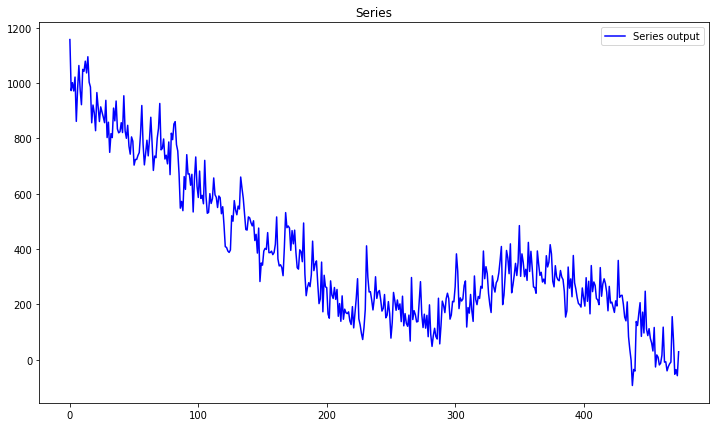

In [17]:
train_data, test_data = df['y'][0:int(len(df)*0.95)], df['y'][int(len(df)*0.95):]
plt.figure(figsize=(12,7))
plt.title('Series')
plt.plot(df['y'][0:len(df)-25], 'blue', label='Series output')
plt.legend()

In [16]:
train_ar = train_data.values
test_ar = test_data.values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(15,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    #obs = test_ar[t]
    history.append(yhat)
    #print('predicted=%f, expected=%f' % (yhat, obs))

<class 'list'>


C:\Users\hp\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\hp\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\hp\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

In [18]:
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
predictions = np.array(predictions).ravel()
#print(predictions.shape)
error2 = smape_kun(Y_Test, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
print(predictions)

Testing Mean Squared Error: 3911.441
Symmetric mean absolute percentage error: 136.514
[ -1.58924831 130.74046399  36.88570607  22.69030881   6.54279664
   9.73476589  29.93690918   7.91814368 105.02884388  67.22115623
  15.75243246  30.75079683  21.19428844  60.81632229  23.57693598
 117.0460035   65.99448715  51.26204056  50.28710037  52.31741046
  68.837283    43.84174427 108.75640147  87.98083207  63.9792876 ]


In [22]:
df['y'][len(df)-27]

-58.1328402667433

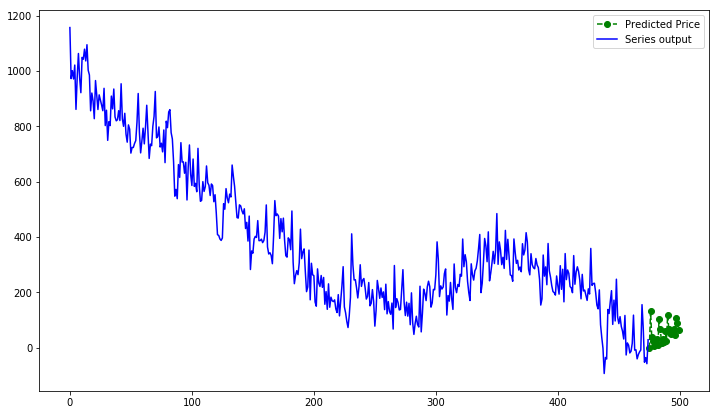

In [19]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(df['y'][0:len(df)-25], 'blue', label='Series output')
plt.legend()